# Introduction

### I am an enterprising entrepreneur. I have developed a product for Airbnb. This product will (1) Increase Airbnbs client satisfaction, (2) increase Airbnb client sales, (3) increase Airbnb revenue.  

## The story
I started of as a young professional in London. I had a two bedroom flat. To generate some additional income I decided to rent one of the bedrooms. To register my room in airbnb the the process was more convoluted and complicated that i expencted. Then came the time where I was to decide the price i should list the room for. The advice from airbnb was the following:


#### *'What to charge? It’s up to you, but these tips could help you decide:'*

As a first time renter i had no Idea where to start. As a result, I thought that it would be a good idea to use data to reach some conclusion. 


## The business case
I found that airbnb share a lot of their data publically. I wanted to find a way to predict the market value of your said property per night. This is valuable for three main reasons. 

1. Increase Airbnbs client satisfaction - Users like me have do doubt had similar conundrums. I hope this will allow for users to have a better and easier experience while listing properties in Airbnb. 

2. Increase Airbnb client sales - Not being able to value your property is a serious problem. This has significant impacts on your ability to sell your product. Being able to accuratley price your product should incrase the clients revenue.

3. Increase Airbnb revenue - The more sales that happen on Airbnb the higher the Airbnb revenue. Accurate pricing will bring in customers who would have bought other products (hotel rooms etc) more sales for Airbnb customers will mean more revenue for Airbnb. 


## The Idea

I will build a model that will predict the price of Airbnb's. 

I will use this to build a dashboard so that people can input details about their property and for an estimate price to be generated.

# Part 1: Import Libraries

In [1]:
#data science
import pandas as pd
import numpy as np 

#plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#xgboost
import xgboost
from xgboost import XGBRegressor
from hyperopt import hp
from hyperopt import hp,Trials,tpe,fmin,STATUS_OK

#sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#misc
import re 
from datetime import datetime

# Part 2: Load and Clean Data

All the data for this project can be taken from http://insideairbnb.com/get-the-data.html ( I used the December 7, 2021 and the November 7, 2021 data)

## 2.1 Listings Data

In [2]:
df_list_nov = pd.read_csv('listings_november.csv.gz',compression='gzip')
print(f"Loaded 'listings_november.csv.gz' file, shape: {df_list_nov.shape}")
df_list_dec = pd.read_csv('listings_december.csv.gz',compression='gzip')
print(f"Loaded 'listings_december.csv.gz' file, shape: {df_list_dec.shape}")

Loaded 'listings_november.csv.gz' file, shape: (66951, 74)
Loaded 'listings_december.csv.gz' file, shape: (66641, 74)


creating one data from from both tables 

In [3]:
df_list = pd.concat([df_list_nov,df_list_dec],ignore_index=True)
df_list.shape


(133592, 74)

In [4]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211109052113,2021-11-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211109052113,2021-11-10,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.78
2,17402,https://www.airbnb.com/rooms/17402,20211109052113,2021-11-10,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20211109052113,2021-11-10,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,25123,https://www.airbnb.com/rooms/25123,20211109052113,2021-11-10,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,...,4.89,4.45,4.74,NaN,t,3,0,3,0,0.95


In [5]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
df_list['property_type'].unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Private room in townhouse', 'Private room in residential home',
       'Entire townhouse', 'Private room in condominium (condo)',
       'Room in serviced apartment', 'Entire condominium (condo)',
       'Entire serviced apartment', 'Room in aparthotel',
       'Private room in loft', 'Entire residential home',
       'Shared room in rental unit', 'Tiny house', 'Entire guest suite',
       'Entire loft', 'Houseboat', 'Private room in bed and breakfast',
       'Private room in bungalow', 'Entire guesthouse',
       'Private room in guesthouse', 'Shared room in residential home',
       'Private room in cottage', 'Private room in guest suite',
       'Entire cabin', 'Private room', 'Room in bed and breakfast',
       'Private room in yurt', 'Private room in serviced apartment',
       'Boat', 'Room in boutique hotel', 'Private room in villa',
       'Entire cottage', 'Private room in parking space', 'Entire place',
    

Having reviewed a lot of the data, I have decided to keep the below data to do additional work on 

In [7]:
features_to_keep = [
    'name','description','host_since','host_location',
    'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count',
    'host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed','latitude',"maximum_nights",
    'longitude', 'property_type', 'room_type', 'accommodates','bathrooms','bedrooms','beds','amenities','minimum_nights',
    'instant_bookable','price'
]

print(f'{df_list.shape[1]} features before cleaning')
df_list = df_list[features_to_keep]
print(f'{df_list.shape[1]} features after cleaning')

74 features before cleaning
25 features after cleaning


This function cleans price. As you can see from the data table, price is not in a workable wormat. We need to:
1. delete the symbol
2. delete the last two digits
3. delete the seperateing commas

In [8]:
def clean_price(x):
    x = x[1:-3] 
    x = re.sub(r'[^\w\s]','',x)
    return float(x)

price = df_list['price'].apply(lambda x: clean_price(x))
df_list = df_list.drop(columns=['price'])
price.describe()

count    133592.000000
mean        142.804876
std         327.815840
min           0.000000
25%          46.000000
50%          82.000000
75%         143.000000
max       18557.000000
Name: price, dtype: float64

## 2.2 Further Data

In [9]:
# df_review_short = pd.read_csv('../data/reviews.csv')
# print(f"Loaded 'reviews.csv' file, shape: {df_review_short.shape}")
# df_review_full = pd.read_csv('../data/reviews.csv.gz',compression='gzip')
# print(f"Loaded 'reviews.csv.gz' file, shape: {df_review_full.shape}")
# df_review = df_review_full.merge(df_review_short,on=['listing_id','date'])
# print(f"Merged two reviews' datasets into one, shape: {df_review.shape}")

In [10]:
#df_calendar = pd.read_csv('../data/calendar.csv.gz',compression='gzip')

## 2.3 Data Pre-Processing

Overall: 24 features

Text features (2):

<ul>
    <li>name</li>
    <li>description</li>
</ul>

Numeric features (9):

<ul>
    <li>host_response_rate</li>
    <li>host_acceptance_rate</li>
    <li>host_listings_count</li>
    <li>accommodates</li>
    <li>bedrooms</li>
    <li>beds</li>
    <li>bathrooms</li>
    <li>minimum_nights</li>
    <li>maximum_nights</li>
</ul>

Categorical features (8):

<ul>
    <li>host_is_superhost</li>
    <li>host_has_profile_pic</li>
    <li>host_identity_verified</li>
    <li>host_response_time</li>
    <li>neighbourhood_cleansed</li>
    <li>property_type</li>
    <li>room_type</li>
    <li>instant_bookable</li>
    <li>amenities</li>
</ul>

Datetime features (1):

<ul>
    <li>host_since</li>
</ul>

Features that won't be used in training, but might be used for feature engineering (4):

<ul>
    <li>latitude</li>
    <li>longitude</li>
    <li>amenities</li>
    <li>host_location</li>
</ul>

### 2.3.1 Categorical Features

here we make true values equal to 1 and false values equal to 0

In [11]:
mult_cat_feats = ['neighbourhood_cleansed','property_type','room_type','host_response_time']
bool_feats = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']

In [12]:
def clean_bool(x):
    if x == 't':
        return 1
    else:
        return 0

for bool_feat in bool_feats:
    df_list[bool_feat] = df_list[bool_feat].apply(lambda x: clean_bool(x))

### 2.3.2 Numeric Features

Here we clean some of the numeric values that are not integers

In [13]:
def clean_num(x):
    if type(x) is not float:
        x = x[:-1]
        return int(x)
    else:
        return None

num_feats_to_clean = ['host_response_rate','host_acceptance_rate']

for feat in num_feats_to_clean:
    df_list[feat] = df_list[feat].apply(lambda x: clean_num(x))

### 2.3.3 Datetime features

Here we manupulate the host_since value to get the number of days since the host has been a host

In [14]:
def get_host_since_days(x):
    try:
        diff = (datetime.date(datetime.strptime('07/12/21','%d/%m/%y'))-x).days
        return diff
    except:
        return None 

df_list['host_since'] = pd.DatetimeIndex(df_list['host_since']).date.tolist()
df_list['host_since_days'] = df_list['host_since'].apply(lambda x: get_host_since_days(x))

In [15]:
graphs = pd.concat([df_list, price], axis=1)


In [16]:
graphs['neighbourhood_cleansed'].unique()

array(['Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Croydon', 'Southwark',
       'Waltham Forest', 'Brent', 'Camden', 'Newham', 'Tower Hamlets',
       'Lambeth', 'Hackney', 'Merton', 'Lewisham', 'Wandsworth',
       'Bromley', 'Havering', 'Greenwich', 'Enfield', 'City of London',
       'Ealing', 'Barking and Dagenham', 'Hillingdon', 'Harrow',
       'Redbridge', 'Kingston upon Thames', 'Bexley', 'Sutton'],
      dtype=object)

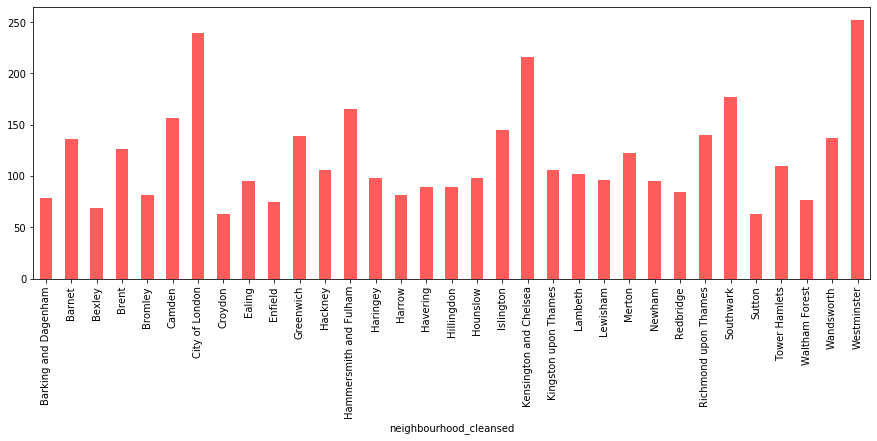

In [17]:
dfg = graphs.groupby(['neighbourhood_cleansed'])['price'].mean()
dfg.plot(kind='bar', stacked=True, figsize=(15,5), color = '#ff5c5c')

In [18]:
df_list['host_acceptance_rate'].mean()

75.16319220681903

A chart showing price grouped by whether the host is a superhost or not

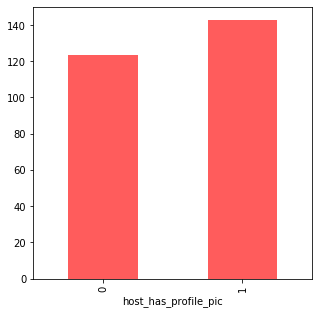

In [19]:
dfg1 = graphs.groupby(['host_has_profile_pic'])['price'].mean()
dfg1.plot(kind='bar', stacked=True, figsize=(5,5), color = '#ff5c5c')

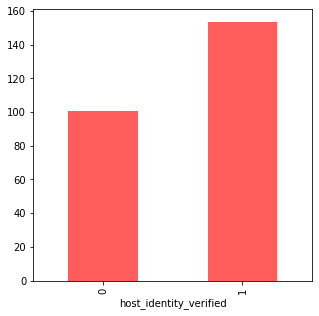

In [20]:
dfg1 = graphs.groupby(['host_identity_verified'])['price'].mean()
dfg1.plot(kind='bar', stacked=True, figsize=(5,5), color = '#ff5c5c')

A chart showing price grouped by number of beds

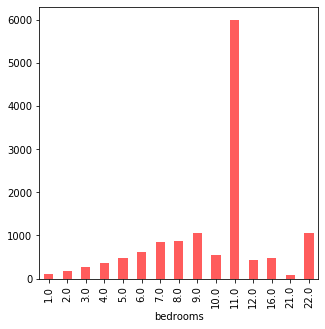

In [21]:
dfg1 = graphs.groupby(['bedrooms'])['price'].mean()
dfg1.plot(kind='bar', stacked=True, figsize=(5,5), color = '#ff5c5c')

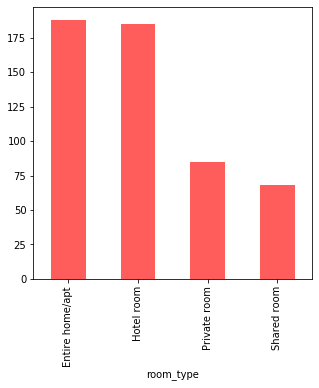

In [22]:
dfg1 = graphs.groupby(['room_type'])['price'].mean()
dfg1.plot(kind='bar', stacked=True, figsize=(5,5), color = '#ff5c5c')

### 2.3.4 Feature Engineering

We have a feature called 'amenities' these range from things like 'shampoo' to 'nivea soap' as a result it is difficult to use this feature. We thus change it from being a categorical value to having a number. It is true that in this case you could fool the model by putting as many amenities as possible however its feature importance is not incredibly high and the user does not know this

In [23]:
def get_num_amenities(x):
    str_list = x[1:-1]
    am_list = str_list.split(',')
    return len(am_list)

df_list['num_amenities'] = df_list['amenities'].apply(lambda x: get_num_amenities(x))

In [24]:
unique_amenities = set()

for i in range(df_list.shape[0]):
    str_list = df_list['amenities'].iloc[i]
    str_list = str_list[1:-1]
    am_list = str_list.split(',')
    for am in am_list:
        am_clean = am[1:-1]
        unique_amenities.add(am_clean)

A chart showing price grouped by bourough 

In [25]:
df_list.columns

Index(['name', 'description', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'maximum_nights', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'instant_bookable', 'host_since_days',
       'num_amenities'],
      dtype='object')

A chart showing price grouped by whether the host is a superhost or not

## 2.4 Final Data Preparation 

In [27]:
features_to_keep = [
    'host_since_days','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count',"maximum_nights",
    'host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed','property_type', 'room_type', 'accommodates','bathrooms','bedrooms','beds','minimum_nights',
    'instant_bookable','num_amenities'
]

df_list = df_list[features_to_keep]
df_list = pd.get_dummies(df_list)

## 2.5 Clean Price Outliers

We decide to delete outliers as those who are 2 standard deviations away from the mean

In [29]:
lim = price.mean()+2*price.std() 
print(f"${lim} This is our max Airbnb price")
prop_removed = round(((price[price>lim].count())/(price.count()))*100,2)
print(f"{prop_removed}% of data points can be removed from the dataset")

$798.436556902554 This is our max Airbnb price
1.92% of data points can be removed from the dataset


In [30]:
price = price[price<lim]

In [31]:
df_list = df_list.loc[price.index]

# Part 3: Model Training and Testing

## 3.1 Training

See that i have also broken by trainign test into validation. As i was researching i saw that it is even better practive than simple test train to break train into train and validate. this way you never touch the training dataset at all

In [32]:
X_train,X_test,y_train,y_test = train_test_split(df_list,price,train_size=.9)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=.8)

X_train.shape,X_val.shape,X_test.shape

((94339, 151), (23585, 151), (13103, 151))

### 3.1.1 Hyperparameters Tuning

Here I fidn the best parameters for my model. After research i found that this is a more efficint way of tunign parameters than gridsearch. As opposed to going though every combination as gridsearch does here we choose a random combination then based on how our model perfors we continue to adjust. Although this takes a whiel to run we can then fine our best parameters

In [31]:
#space = {'n_estimators': hp.quniform('n_estimators',50,500,10),'eta':hp.uniform('eta',0.05,0.6),
#     'max_depth':hp.randint('max_depth',20),'min_child_weight':hp.quniform('min_child_weight',0,10,1),'gamma':hp.uniform('gamma',0,9),
#     'colsample_bytree':hp.uniform('colsample_bytree',0.5,1),'reg_lambda':hp.quniform('reg_lambda',0,100,1),}

#def objective(params):
#    num_round = int(params['n_estimators'])
#    del params['n_estimators']
#    
#    dtrain = xgboost.DMatrix(X_train,label=y_train)
#    dval = xgboost.DMatrix(X_val,label=y_val)
#    watchlist = [(dval,'eval'), (dtrain,'train')]

#    model = xgboost.train(params, dtrain, num_round,
#                           evals=watchlist,
#                           verbose_eval=False)
#    preds = model.predict(dval)
#    rmse = np.sqrt(mean_squared_error(y_val,preds))
#    return {"loss":rmse,"status":STATUS_OK}

#trials = Trials()
    
#best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
#print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  1%|          | 1/100 [00:51<1:24:49, 51.40s/trial, best loss: 57.83645532025849]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  2%|▏         | 2/100 [05:24<3:12:46, 118.03s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  3%|▎         | 3/100 [09:44<4:19:38, 160.60s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  4%|▍         | 4/100 [11:19<3:45:06, 140.69s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  5%|▌         | 5/100 [12:26<3:08:04, 118.78s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  6%|▌         | 6/100 [13:37<2:43:38, 104.45s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  7%|▋         | 7/100 [15:24<2:42:50, 105.06s/trial, best loss: 47.09193852831462]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  8%|▊         | 8/100 [19:19<3:40:47, 144.00s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



  9%|▉         | 9/100 [21:52<3:42:30, 146.71s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 10%|█         | 10/100 [26:04<4:27:23, 178.27s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 11%|█         | 11/100 [30:24<5:01:12, 203.06s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 12%|█▏        | 12/100 [32:13<4:16:07, 174.63s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 13%|█▎        | 13/100 [33:10<3:22:19, 139.53s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 14%|█▍        | 14/100 [33:44<2:34:20, 107.69s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 15%|█▌        | 15/100 [39:21<4:09:58, 176.46s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 16%|█▌        | 16/100 [41:21<3:43:33, 159.68s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 17%|█▋        | 17/100 [45:30<4:17:51, 186.40s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 18%|█▊        | 18/100 [50:40<5:05:24, 223.47s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 19%|█▉        | 19/100 [54:47<5:11:25, 230.68s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 20%|██        | 20/100 [55:03<3:41:25, 166.07s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 21%|██        | 21/100 [1:00:48<4:49:21, 219.77s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 22%|██▏       | 22/100 [1:04:42<4:51:16, 224.06s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 23%|██▎       | 23/100 [1:09:11<5:04:49, 237.52s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 24%|██▍       | 24/100 [1:10:56<4:10:31, 197.79s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 25%|██▌       | 25/100 [1:13:30<3:50:46, 184.62s/trial, best loss: 43.64326808745404]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 26%|██▌       | 26/100 [1:18:17<4:25:34, 215.33s/trial, best loss: 43.3551060027836] 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 27%|██▋       | 27/100 [1:21:36<4:15:59, 210.41s/trial, best loss: 43.3551060027836]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 28%|██▊       | 28/100 [1:25:51<4:28:47, 223.99s/trial, best loss: 43.3551060027836]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 29%|██▉       | 29/100 [1:30:59<4:54:37, 248.98s/trial, best loss: 42.939764151453716]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 30%|███       | 30/100 [1:34:38<4:39:57, 239.96s/trial, best loss: 42.939764151453716]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 31%|███       | 31/100 [1:35:59<3:41:10, 192.32s/trial, best loss: 42.939764151453716]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 32%|███▏      | 32/100 [1:42:53<4:53:20, 258.83s/trial, best loss: 42.14545380647356] 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 33%|███▎      | 33/100 [1:46:51<4:42:05, 252.62s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 34%|███▍      | 34/100 [1:51:37<4:48:50, 262.59s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 35%|███▌      | 35/100 [1:52:46<3:41:37, 204.57s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 36%|███▌      | 36/100 [1:53:38<2:49:15, 158.68s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 37%|███▋      | 37/100 [1:58:59<3:37:59, 207.61s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 38%|███▊      | 38/100 [2:03:53<4:01:19, 233.54s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 39%|███▉      | 39/100 [2:06:23<3:31:43, 208.26s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 40%|████      | 40/100 [2:09:43<3:25:56, 205.94s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 41%|████      | 41/100 [2:11:36<2:55:10, 178.14s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 42%|████▏     | 42/100 [2:12:56<2:23:35, 148.54s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 43%|████▎     | 43/100 [2:15:45<2:26:58, 154.70s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 44%|████▍     | 44/100 [2:16:20<1:50:59, 118.92s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 45%|████▌     | 45/100 [2:21:58<2:49:14, 184.62s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 46%|████▌     | 46/100 [2:22:17<2:01:23, 134.88s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 47%|████▋     | 47/100 [2:24:17<1:55:02, 130.24s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 48%|████▊     | 48/100 [2:28:28<2:24:17, 166.49s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 49%|████▉     | 49/100 [2:28:45<1:43:35, 121.86s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 50%|█████     | 50/100 [2:30:25<1:35:56, 115.14s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 51%|█████     | 51/100 [2:32:58<1:43:25, 126.64s/trial, best loss: 42.14545380647356]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 52%|█████▏    | 52/100 [2:41:28<3:13:15, 241.56s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 53%|█████▎    | 53/100 [2:45:24<3:07:54, 239.88s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 54%|█████▍    | 54/100 [2:50:29<3:18:56, 259.49s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 55%|█████▌    | 55/100 [2:57:35<3:51:56, 309.25s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 56%|█████▌    | 56/100 [3:05:36<4:24:41, 360.95s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 57%|█████▋    | 57/100 [3:12:11<4:25:53, 371.02s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 58%|█████▊    | 58/100 [3:14:13<3:27:35, 296.55s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 59%|█████▉    | 59/100 [3:19:44<3:29:35, 306.72s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 60%|██████    | 60/100 [3:20:57<2:37:41, 236.53s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 61%|██████    | 61/100 [3:23:21<2:15:40, 208.74s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 62%|██████▏   | 62/100 [3:27:22<2:18:20, 218.42s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 63%|██████▎   | 63/100 [3:29:43<2:00:31, 195.44s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 64%|██████▍   | 64/100 [3:30:57<1:35:18, 158.84s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 65%|██████▌   | 65/100 [3:36:38<2:04:29, 213.43s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 66%|██████▌   | 66/100 [3:43:52<2:38:32, 279.78s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 67%|██████▋   | 67/100 [3:52:12<3:10:10, 345.77s/trial, best loss: 41.97087158350894]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 68%|██████▊   | 68/100 [4:00:26<3:28:05, 390.16s/trial, best loss: 41.4304160144037] 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 69%|██████▉   | 69/100 [4:08:00<3:31:27, 409.26s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 70%|███████   | 70/100 [4:16:36<3:40:41, 441.39s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 71%|███████   | 71/100 [4:25:22<3:45:34, 466.70s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 72%|███████▏  | 72/100 [4:30:46<3:17:49, 423.90s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 73%|███████▎  | 73/100 [4:38:07<3:13:07, 429.18s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 74%|███████▍  | 74/100 [4:39:12<2:18:33, 319.75s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 75%|███████▌  | 75/100 [4:45:29<2:20:25, 337.00s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 76%|███████▌  | 76/100 [4:48:19<1:54:45, 286.88s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 77%|███████▋  | 77/100 [4:54:17<1:58:13, 308.43s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 78%|███████▊  | 78/100 [5:00:17<1:58:44, 323.86s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 79%|███████▉  | 79/100 [5:05:00<1:49:03, 311.57s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 80%|████████  | 80/100 [5:07:37<1:28:21, 265.06s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 81%|████████  | 81/100 [5:09:18<1:08:22, 215.94s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 82%|████████▏ | 82/100 [5:18:06<1:32:51, 309.52s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 83%|████████▎ | 83/100 [5:21:49<1:20:18, 283.43s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 84%|████████▍ | 84/100 [5:26:08<1:13:41, 276.37s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 85%|████████▌ | 85/100 [5:31:14<1:11:16, 285.07s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 86%|████████▌ | 86/100 [5:32:39<52:29, 224.97s/trial, best loss: 41.4304160144037]  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 87%|████████▋ | 87/100 [5:34:54<42:56, 198.18s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 88%|████████▊ | 88/100 [5:36:13<32:28, 162.40s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 89%|████████▉ | 89/100 [5:44:19<47:34, 259.52s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 90%|█████████ | 90/100 [5:47:37<40:10, 241.06s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 91%|█████████ | 91/100 [5:50:39<33:28, 223.21s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 92%|█████████▏| 92/100 [5:54:30<30:03, 225.46s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 93%|█████████▎| 93/100 [6:00:47<31:36, 270.94s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 94%|█████████▍| 94/100 [6:08:21<32:35, 325.92s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 95%|█████████▌| 95/100 [6:09:41<21:00, 252.19s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 96%|█████████▌| 96/100 [6:12:18<14:54, 223.71s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 97%|█████████▋| 97/100 [6:15:13<10:26, 208.91s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 98%|█████████▊| 98/100 [6:15:22<04:58, 149.12s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



 99%|█████████▉| 99/100 [6:20:42<03:20, 200.24s/trial, best loss: 41.4304160144037]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



100%|██████████| 100/100 [6:27:26<00:00, 232.46s/trial, best loss: 41.4304160144037]
{'colsample_bytree': 0.9403466900379582, 'eta': 0.21528661704301205, 'gamma': 2.5897781746226523, 'max_depth': 19, 'min_child_weight': 0.0, 'n_estimators': 410.0, 'reg_lambda': 54.0}


{'colsample_bytree': 0.9403466900379582, 'eta': 0.21528661704301205, 'gamma': 2.5897781746226523, 'max_depth': 19, 'min_child_weight': 0.0, 'n_estimators': 410.0, 'reg_lambda': 54.0}



### 3.1.2 Training with the best set of hyperparameters

we use the best features from the tuning to input into our model

In [63]:
fix_params = {'objective':'reg:squarederror','eval_metric':'rmse','seed':42}
best_hyperparams = {'colsample_bytree': 0.9403466900379582, 'eta': 0.21528661704301205, 'gamma': 2.5897781746226523, 'max_depth': 19, 'min_child_weight': 0.0, 'n_estimators': 410, 'reg_lambda': 54.0}
params = {**fix_params,**best_hyperparams}

model = XGBRegressor(**params)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9403466900379582,
             eta=0.21528661704301205, eval_metric='rmse',
             gamma=2.5897781746226523, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=19,
             min_child_weight=0.0, missing=None, n_estimators=410, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=54.0, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

Here we save our model to the folder. I then open this model in Vscode to use in the dash app I built

In [34]:
model.save_model(f'models/model_{str(datetime.today().date())}.json')

NameError: name 'model' is not defined

## 3.2 Evaluation

In [33]:
preds = model.predict(X_test)

NameError: name 'model' is not defined

In [66]:
print(f'RMSE: {np.sqrt(mean_squared_error(preds,y_test)):.2f}')
print(f'Correlation coefficient: {np.corrcoef(preds,y_test)[0,1]:.3f}') #58.44, 0.845

RMSE: 42.97
Correlation coefficient: 0.915


In [68]:
LIMIT = 400
idxs = np.argwhere(y_test.values<LIMIT).flatten()
preds_with_limit = model.predict(X_test.iloc[idxs])
rmse_with_limit = np.sqrt(mean_squared_error(preds_with_limit,y_test.iloc[idxs]))
print(f"RMSE for limit of {LIMIT} is {rmse_with_limit:.2f}")

RMSE for limit of 400 is 32.91


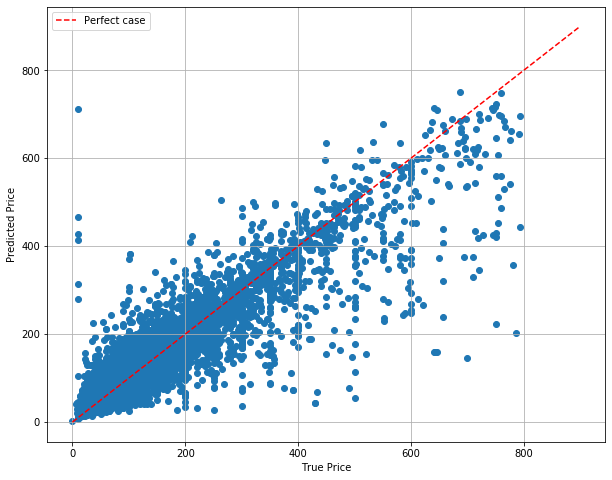

In [75]:
x = np.arange(0,900,1)
y = np.arange(0,900,1)

plt.figure(figsize=[10,8])
plt.scatter(x=y_test,y=preds)
plt.plot(x,y,'--r',label='Perfect case')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.show()

## 3.3 Further Interpretation

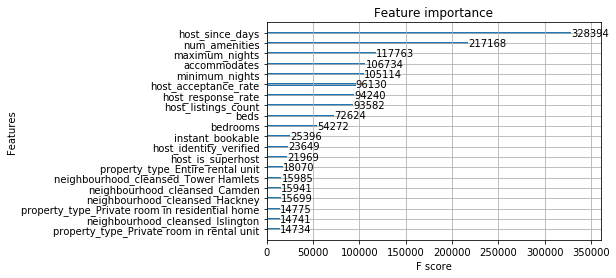

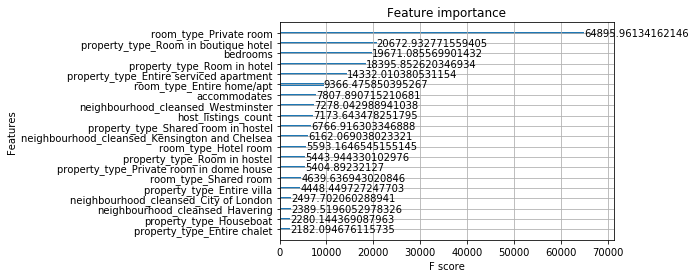

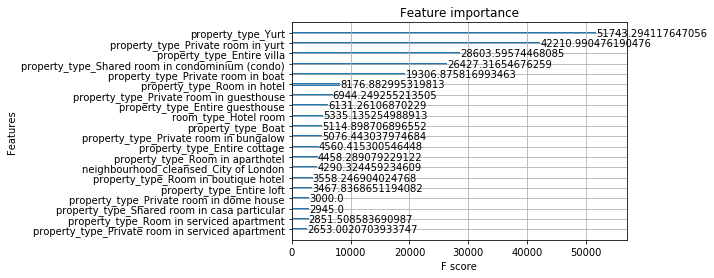

In [70]:
xgboost.plot_importance(model,max_num_features=20,importance_type='weight')
xgboost.plot_importance(model,max_num_features=20,importance_type='gain')
xgboost.plot_importance(model,max_num_features=20,importance_type='cover')

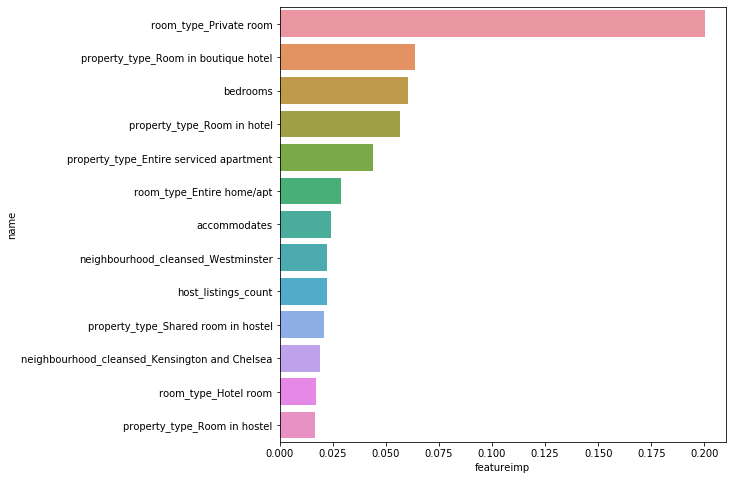

In [73]:
featureimp = model.feature_importances_
dfimp = pd.DataFrame(data=featureimp, columns=["featureimp"])
dfcol = X_train.columns.to_frame(index=False, name = "name")
result = pd.concat([dfimp, dfcol], axis=1)
resultsorted = result.sort_values(by=['featureimp'], ascending = False).head(13)
plt.figure(figsize = (8,8))
sns.barplot(x = resultsorted["featureimp"], y = resultsorted["name"])

# Conclusion

I found great and extensive data from Airbnb. I analysed this data and performed a lot of data manipulation to make sure that it is usabel for us. 

We created an XGBoost model to predict the value of an airbnb property. We hyper tuned this model to find the ideal parameters. We then saved this model and created a dashboard to predict the value of a new property. 

We used dash to create the dashboard. We had to manipulate the data that is inputted into the dashboard so that it is in the right format for the model. We then run the inputed data through our model and we thus generate a price which we display in our dashboard. 


### Extensions

In the future if i had more time i would like to optimise on the following things:

1. I would futher tune the parameters of my model. 
2. I would include other features nameely the following:
    a. I would use NLP to futher tune the amenitites filed
    b. I would use spacy to find the location to major locations in the Uk and use this as an additional feature. 
    c. I would build a feature that calcualtes how close it is to the nearest tube stop
3. I would improve the look of my dashboard

